# 7. Dinâmica de Corpos Rígidos
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 17C


---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

O projetista, face o desafio que um problema não-convencional de mecânica clássica oferece, não deve e não pode perder-se numa miríade de fórmulas e métodos. Uma visão geral do problema específico é o primeiro requisito para o sucesso. Para chegar com segurança à solução, é necessário: saber reconhecer precisamente as forças e torques que atuam no sistema mecânico; identificar inequivocamente o número de graus de liberdade e escolher adequadamente coordenadas, bases vetoriais e eixos, descrevendo o movimento do sistema em termos das coordenadas escolhidas e dominando o uso de referenciais intermediários; ser capaz de montar as matrizes de inércia do sistema; e estar apto a estabelercer um conjunto coerente de equações de movimento e resolvê-las ou delas extrair informações pertinentes. Portanto, o profissional necessita ter, simultaneamente, uma firme formação teórica e um amplo treinamento na metodologia de resolução de problemas.

In [4]:
from IPython.display import IFrame

In [5]:
IFrame('https://www.youtube.com/embed/23f1jvGUWJs',720,405)

## 7.1 Equações de Movimento

In [7]:
from IPython.display import Image

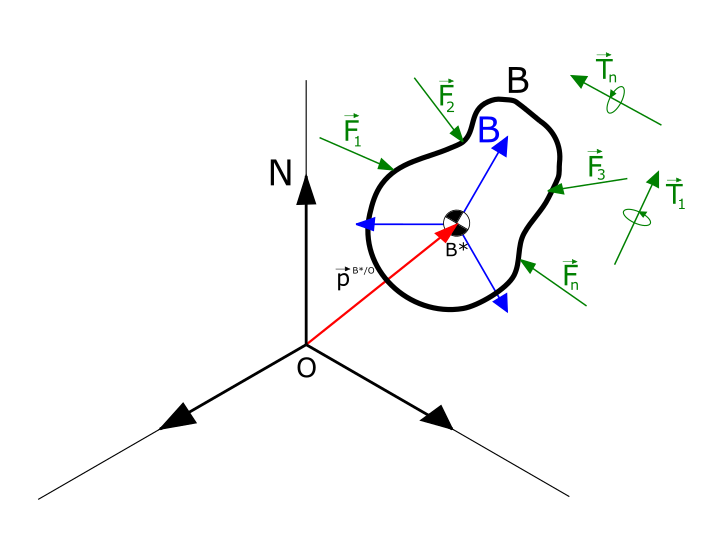

In [8]:
Image('batata05.png',width=500)

Podemos utilizar a Segunda Lei de Newton em um corpo rígido igualando a **resultante das forças** ao produto da massa pela aceleração do **centro de massa**. Ou ainda, igualar a resultante das forças à derivada temporal da quantidade de movimento linear do centro de massa. 
$$ \sum_{i=1}^{n} \vec{F}_{i} = m{}^{N} \vec{a}{}^{*} $$
ou:
$$ \sum_{i=1}^{n} \vec{F}_{i} = m {}^{N} \dot{\vec{G}}{}^{*}$$
Onde $N$ é um referencial inercial. Podemos reescrever a equação vetorial em 3 equações escalares:
$$ F_x = m {}^{N}a_{x}^{*} $$
$$ F_y = m {}^{N}a_{y}^{*} $$
$$ F_z = m {}^{N}a_{z}^{*} $$

Para um corpo rígido, precisaremos complementar as **Equações de Movimento de Newton** usando as **Equações de Movimento de Euler**. <br>
Vimos que o vetor quantidade de movimento angular pode ser definido como:
$$ {}^{N} {\vec{H}}{}^{B/*} = \underline{I}{}^{B/*} . {}^{N}\vec{\omega}{}^{B}$$
Como vimos anteriormente, o momento da resultante das forças mais o somatório de torques é igual a derivada temporal da quantidade de movimento angular. 
$$ \vec{M}{}^{F/*} + \sum_{i=1}^{n}\vec{T}_{n} =  {}^{N} \dot{\vec{H}}{}^{B/*} $$
Onde:
$${}^{N} \dot{\vec{H}}{}^{B/*}  = \dfrac{{}^{N} d \left( \underline{I}^{B/*}.{}^{N}\vec{\omega}^{B} \right)}{dt}  = \underline{I}^{B/*}.{}^{N}\vec{\alpha}{}^{B}+ {}^{N}\vec{\omega}{}^{B} \times \underline{I}^{B/*} . {}^{N}\vec{\omega}{}^{B} $$ 

De modo geral, vamos considerar a velocidade angular e a aceleração angular como:
$${}^{N} \vec{\omega}{}^{B} = \omega_1 \mathbf{\hat{b}_x} + \omega_2 \mathbf{\hat{b}_y} + \omega_3 \mathbf{\hat{b}_z} $$
$${}^{N} \vec{\alpha}{}^{B} = \alpha_1 \mathbf{\hat{b}_x} + \alpha_2 \mathbf{\hat{b}_y} + \alpha_3 \mathbf{\hat{b}_z} $$
Deste modo, teremos:
$${}^{N} \dot{\vec{H}}{}^{B/*}  = I_{xx}\alpha_1 \mathbf{\hat{b}_x}  + I_{yy}\alpha_2 \mathbf{\hat{b}_y} + I_{zz}\alpha_3 \mathbf{\hat{b}_z} + \left( \omega_1 \mathbf{\hat{b}_x} + \omega_2 \mathbf{\hat{b}_y} + \omega_3 \mathbf{\hat{b}_z} \right) \times \left( I_{xx} \omega_1 \mathbf{\hat{b}_x} + I_{yy} \omega_2 \mathbf{\hat{b}_y} + I_{zz} \omega_3 \mathbf{\hat{b}_z} \right) $$
Resolvendo o produto vetorial e passando para a forma escalar:
$$ M_x^* = I_{xx}^* \alpha_1 + \left(I_{zz}^* - I_{yy}^* \right)\omega_3 \omega_2 $$
$$ M_y^* = I_{yy}^* \alpha_2 + \left(I_{xx}^* - I_{zz}^* \right)\omega_1 \omega_3 $$
$$ M_z^* = I_{zz}^* \alpha_3 + \left(I_{yy}^* - I_{xx}^* \right)\omega_2 \omega_1 $$

Para um **problema de corpos rígidos em duas dimensões** as Equações de Movimento de Newton podem ser reduzidas para duas equações e as Equações de Movimento de Euler podem ser reduzidas para uma única equação. Como por exemplo:
$$ F_x = m {}^{N}a_{x}^{*} $$
$$ F_y = m {}^{N}a_{y}^{*} $$
$$ M_z^* = I_{zz}^* \alpha_3 $$

### Exemplo 1
Simular o comportamento de um pêndulo de massa distribuída:

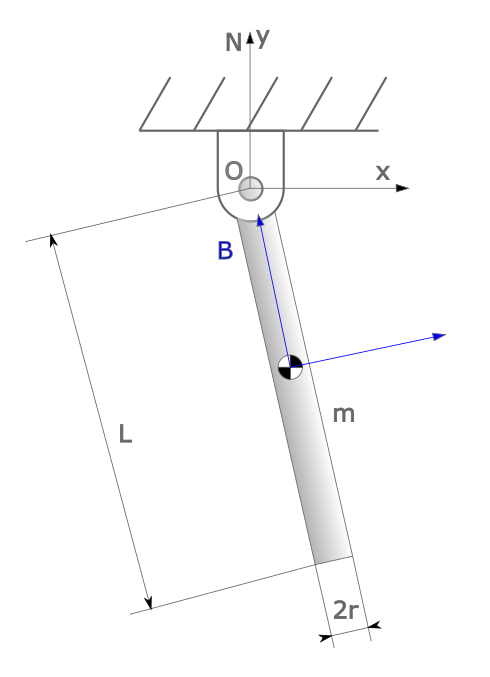

In [14]:
Image('pend_fis.png',width=300)

In [15]:
import sympy as sy
import sympy.physics.mechanics as me

In [16]:
m,r,L = sy.symbols('m r L')
theta = me.dynamicsymbols('theta')

In [17]:
N = me.ReferenceFrame('N')

In [18]:
B = me.ReferenceFrame('B')
B.orient(N,'Axis',[theta,N.z])

In [19]:
O = me.Point('O')
O.set_vel(N,0)

In [20]:
CM = me.Point('CM')
p = -L/2*B.y
CM.set_pos(O,p)
CM.set_vel(N,p.dt(N))

In [21]:
Ix = m*r*2/4 + m*L**2/12
Iz = Ix
Iy = m*r**2/2

In [22]:
I = me.inertia(B,Ix,Iy,Iz)
I.to_matrix(B)

Matrix([
[L**2*m/12 + m*r/2,        0,                 0],
[                0, m*r**2/2,                 0],
[                0,        0, L**2*m/12 + m*r/2]])

No python, podemos definir um corpo rígido da seguinte maneira:<br>
Comando me.RigidBody('B',P,C,M,(I,O))<br>

| Símbolo | Significado |
|---------|-------------|
| B | Nome do corpo |
| P | O ponto que representa o centro de massa |
| C | Sistema de referência fixo no corpo |
| m | Massa do corpo |
| I | Tensor de inércia |
| O | Ponto em que o tensor de inércia está definido |

In [24]:
Pend = me.RigidBody('Pend',CM,B,m,(I,CM))

In [25]:
G = Pend.linear_momentum(N)
G

L*m*Derivative(theta(t), t)/2*B.x

In [26]:
H = Pend.angular_momentum(O,N)
H

(L**2*m*Derivative(theta(t), t)/4 + (L**2*m/12 + m*r/2)*Derivative(theta(t), t))*B.z

In [27]:
H.dt(N)

(L**2*m*Derivative(theta(t), (t, 2))/4 + (L**2*m/12 + m*r/2)*Derivative(theta(t), (t, 2)))*B.z

In [28]:
me.find_dynamicsymbols(H,reference_frame=N)

{Derivative(theta(t), t), theta(t)}

Ao utilizar o método de Newton-Euler precisamos fazer DCL

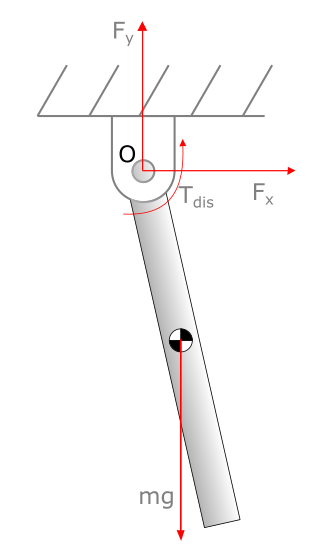

In [30]:
Image('pend_fis2.png',width=300)

In [31]:
g,Fx,Fy,c = sy.symbols('g Fx Fy c')
t = me.dynamicsymbols._t

In [32]:
F = Fx*N.x + Fy*N.y - m*g*N.y

In [33]:
Fstar = -G.dt(N) # Força de inércia

In [34]:
PrincDAlmbert = F + Fstar
PrincDAlmbert

Fx*N.x + (Fy - g*m)*N.y - L*m*Derivative(theta(t), (t, 2))/2*B.x - L*m*Derivative(theta(t), t)**2/2*B.y

In [35]:
M_O = -c*theta.diff()*N.z + p.cross(-m*g*N.y)
M_O

(-L*g*m*sin(theta(t))/2 - c*Derivative(theta(t), t))*N.z

In [36]:
Eq = M_O + (-H.dt(N))
Eq

(-L*g*m*sin(theta(t))/2 - c*Derivative(theta(t), t))*N.z + (-L**2*m*Derivative(theta(t), (t, 2))/4 - (L**2*m/12 + m*r/2)*Derivative(theta(t), (t, 2)))*B.z

In [37]:
Eqz = Eq.dot(N.z)
Eqz

-L**2*m*Derivative(theta(t), (t, 2))/4 - L*g*m*sin(theta(t))/2 - c*Derivative(theta(t), t) - (L**2*m/12 + m*r/2)*Derivative(theta(t), (t, 2))

In [38]:
sy.collect(Eqz, theta)

-L*g*m*sin(theta(t))/2 - c*Derivative(theta(t), t) + (-L**2*m/3 - m*r/2)*Derivative(theta(t), (t, 2))

In [39]:
print(sy.latex(Eqz))

- \frac{L^{2} m \frac{d^{2}}{d t^{2}} \theta{\left(t \right)}}{4} - \frac{L g m \sin{\left(\theta{\left(t \right)} \right)}}{2} - c \frac{d}{d t} \theta{\left(t \right)} - \left(\frac{L^{2} m}{12} + \frac{m r}{2}\right) \frac{d^{2}}{d t^{2}} \theta{\left(t \right)}


Equação de Movimento no eixo Z:
$$- \frac{L^{2} m \ddot{\theta}}{4} - \frac{L g m \operatorname{sin}\left(\theta\right)}{2} - c \dot{\theta} - \left(\frac{L^{2} m}{12} + \frac{m r}{2}\right) \ddot{\theta} = 0
$$

In [41]:
th_2pontos = sy.solve(Eqz,theta.diff(t,2))[0]
th_2pontos

-(3*L*g*m*sin(theta(t)) + 6*c*Derivative(theta(t), t))/(m*(2*L**2 + 3*r))

In [42]:
from numpy import linspace

In [43]:
tn = linspace(0,20,1000) # criação de um tempo numérico

In [44]:
dic = {m:1,g:9.8,L:0.5,c:0.05,r:0.010} # Unidades no SI

In [45]:
th_2pontos_num = th_2pontos.subs(dic)
th_2pontos_num

-27.7358490566038*sin(theta(t)) - 0.566037735849057*Derivative(theta(t), t)

Vamos definir as condições iniciais do nosso sistema

In [47]:
th0 = 0.0
w0 = 1
X0 = [th0,w0]

Vamos criar uma função em python para receber 2 EDOs de primeira ordem:

In [49]:
def Modelo(X,T):
    th_ponto = X[1]
    th_2p = th_2pontos_num.subs({theta.diff(t):X[1],theta:X[0]})
    return [th_ponto,th_2p]

In [50]:
from scipy.integrate import odeint

In [51]:
X = odeint(Modelo,X0,tn)

In [52]:
import matplotlib.pyplot as plt

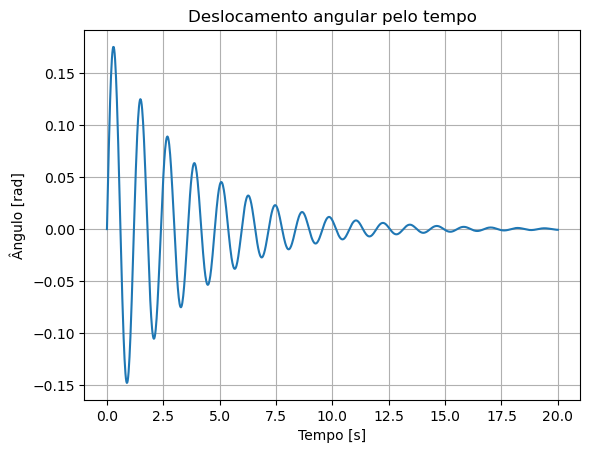

In [53]:
plt.figure()
plt.plot(tn,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title('Deslocamento angular pelo tempo')
plt.grid(True)

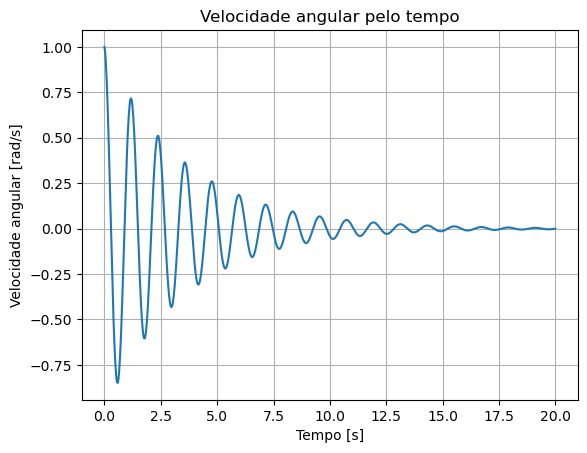

In [54]:
plt.figure()
plt.plot(tn,X[:,1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Velocidade angular pelo tempo')
plt.grid(True)

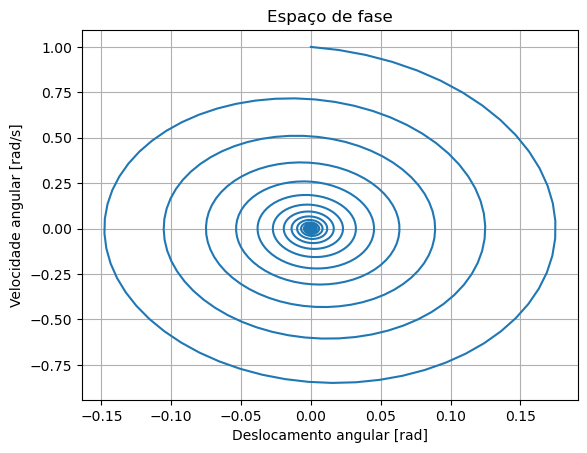

In [55]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel('Deslocamento angular [rad]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Espaço de fase')
plt.grid(True)

### Exemplo 2:

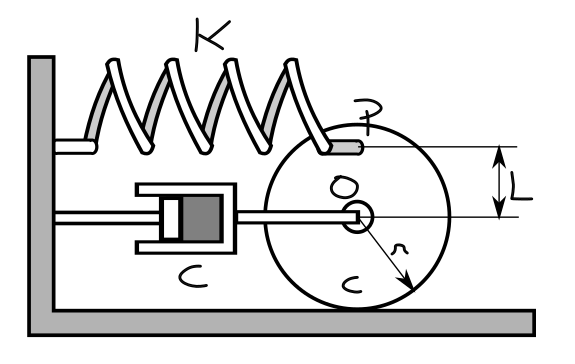

In [57]:
Image('Din_Corpo_2.png',width=400)

In [58]:
theta = me.dynamicsymbols('theta')

In [59]:
r,L = sy.symbols('r L')

In [60]:
N = me.ReferenceFrame('N')
D = me.ReferenceFrame('D')

In [61]:
D.orient(N,'Axis',[-theta,N.z])

In [62]:
C = me.Point('C')
C.set_vel(N,0)

In [63]:
CM = me.Point('CM')
CM.set_pos(C,r*theta*N.x + r*N.y)
CM.set_vel(N,r*theta.diff(t)*N.x)

In [64]:
CM.vel(N)

r*Derivative(theta(t), t)*N.x

In [65]:
CM.acc(N)

r*Derivative(theta(t), (t, 2))*N.x

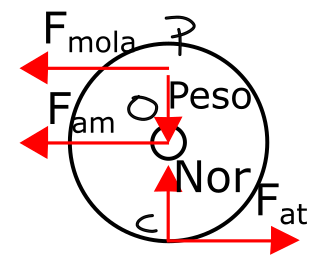

In [66]:
Image('Din_Corpo_3.png')

In [67]:
 k,c,m,g,Fat,Nor = sy.symbols('k c m g Fat Nor')

In [68]:
I = me.inertia(D,0,0,(m*r**2)/2)

In [69]:
Disco = me.RigidBody('Disco',CM,D,m,(I,CM))

In [70]:
G = Disco.linear_momentum(N)
G

m*r*Derivative(theta(t), t)*N.x

In [71]:
Disco.angular_momentum(CM,N)

- m*r**2*Derivative(theta(t), t)/2*D.z

In [72]:
H = Disco.angular_momentum(C,N)
H

- m*r**2*Derivative(theta(t), t)*N.z - m*r**2*Derivative(theta(t), t)/2*D.z

Considerando pequenas deformações da mola, podemos simplificar o problema considerando que o ponto $P$ se move apenas na horizontal.

In [74]:
Fam = -c*CM.vel(N)
Fmola = -k*(r + L)*sy.tan(theta)*N.x
peso = -m*g*N.y

In [75]:
R = Fam + Fmola + peso + Nor*N.y + Fat*N.x

In [76]:
T = me.cross(CM.pos_from(C),Fam) + me.cross((L + r)*N.y,Fmola) + me.cross(CM.pos_from(C),peso)

In [77]:
eqNx = me.dot(G.dt(N),N.x) - me.dot(R,N.x)
eqNy = me.dot(G.dt(N),N.y) - me.dot(R,N.y)
eqNz = me.dot(H.dt(N),N.z) - me.dot(T,N.z)

In [78]:
sy.Matrix([eqNx,eqNy,eqNz])

Matrix([
[                        -Fat + c*r*Derivative(theta(t), t) + k*(L + r)*tan(theta(t)) + m*r*Derivative(theta(t), (t, 2))],
[                                                                                                             -Nor + g*m],
[-c*r**2*Derivative(theta(t), t) + g*m*r*theta(t) - k*(L + r)**2*tan(theta(t)) - 3*m*r**2*Derivative(theta(t), (t, 2))/2]])

In [79]:
thpp = sy.solve(eqNz,theta.diff(t,2))
thpp[0]

2*(-c*r**2*Derivative(theta(t), t) + g*m*r*theta(t) - k*(L + r)**2*tan(theta(t)))/(3*m*r**2)

In [80]:
parametros = {r:0.5,L:0.3,k:15,c:0.5,m:1,g:9.8}

In [81]:
thppn = thpp[0].subs(parametros)

In [82]:
t0 = 0 # tempo inicial
tf = 15 # tempo final
b = 0.01 # passo de integração
n = int(tf/b) # número de pontos

tn = linspace(t0,tf,n)
xn = 0 # deslocamento inicial
vn = 0.2 # velocidade inicial
x0 = [xn,vn]

In [83]:
def modelo(X,tn): #X[0] é o deslocamento e X[1] é a velocidade
    th_ponto = X[1]
    th_2pontos = thppn.subs({theta:X[0],theta.diff(t):X[1]})
    return [th_ponto,th_2pontos]

In [84]:
X = odeint(modelo,x0,tn)

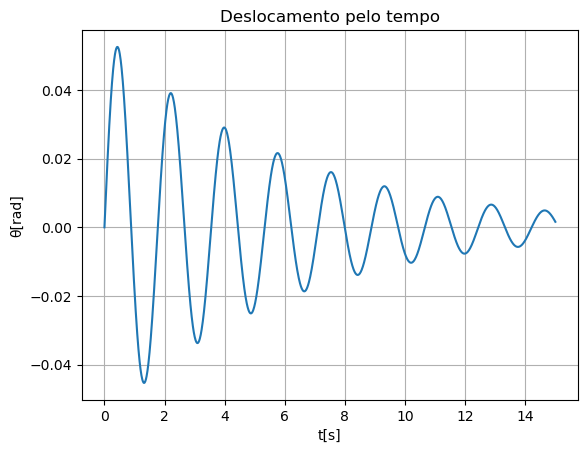

In [85]:
plt.figure()
plt.plot(tn,X[:,0])
plt.xlabel('t[s]')
xstr = chr(952) + '[rad]'
plt.ylabel(xstr)
plt.title('Deslocamento pelo tempo')
plt.grid(True)

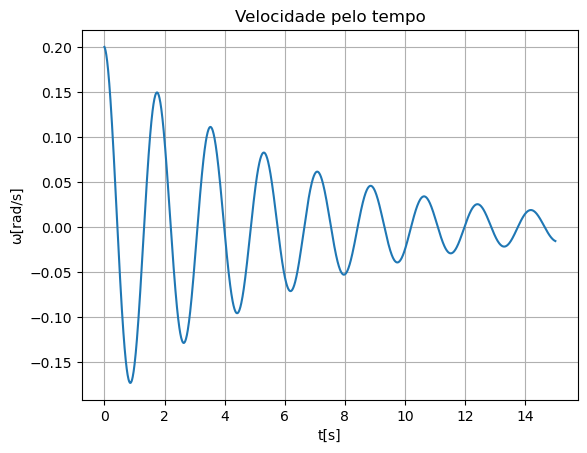

In [86]:
plt.figure()
plt.plot(tn,X[:,1])
plt.xlabel('t[s]')
vstr = chr(969) + '[rad/s]'
plt.ylabel(vstr)
plt.title('Velocidade pelo tempo')
plt.grid(True)

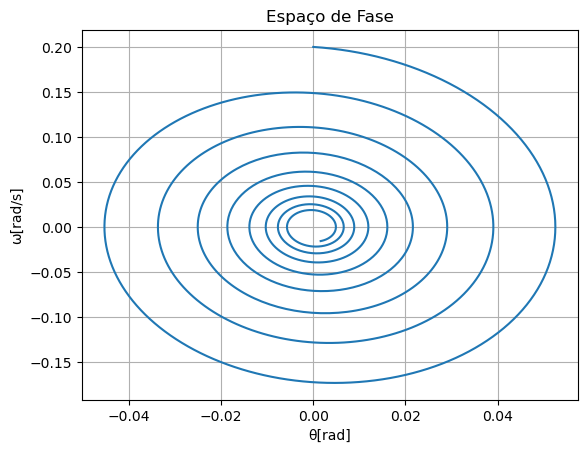

In [87]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel(xstr)
plt.ylabel(vstr)
plt.title('Espaço de Fase')
plt.grid(True)

## 7.2 Efeito Giroscópico

Um giroscópio consiste, essencialmente, de um corpo com simetria de revolução (axissimetria), que pode girar livremente em torno de um ou mais de seus eixos.

O comportamento dinâmico de giroscópios é um dos temas mais interessantes da dinâmica de corpos rígidos e vem sendo explorado em importantes dispositivos de uso prático, tais como sistemas de navegação inercial.

In [90]:
IFrame('https://www.youtube.com/embed/xQb-N486mA4',720,405)

In [91]:
IFrame("https://www.youtube.com/embed/ty9QSiVC2g0",720,405)

O efeito giroscópico pode ser explicado pela variação da quantidade de movimento angular na direção do torque aplicado. Conforme mostrado na figura a seguir, o rotor girava inicialmente com um vetor quantidade de movimento angular $H_0$ na direção $Z$. Ao se aplicar um torque $T$ na direção $Y$, o vetor quantidade de movimento angular irá variar $\Delta H$ na direção $Y$ (mesma do torque), resultando em um novo vetor quantidade de movimento angular, em que este novo vetor está rotacionado de um ângulo $\theta$ na diração $X$ em relação a $H_0$.

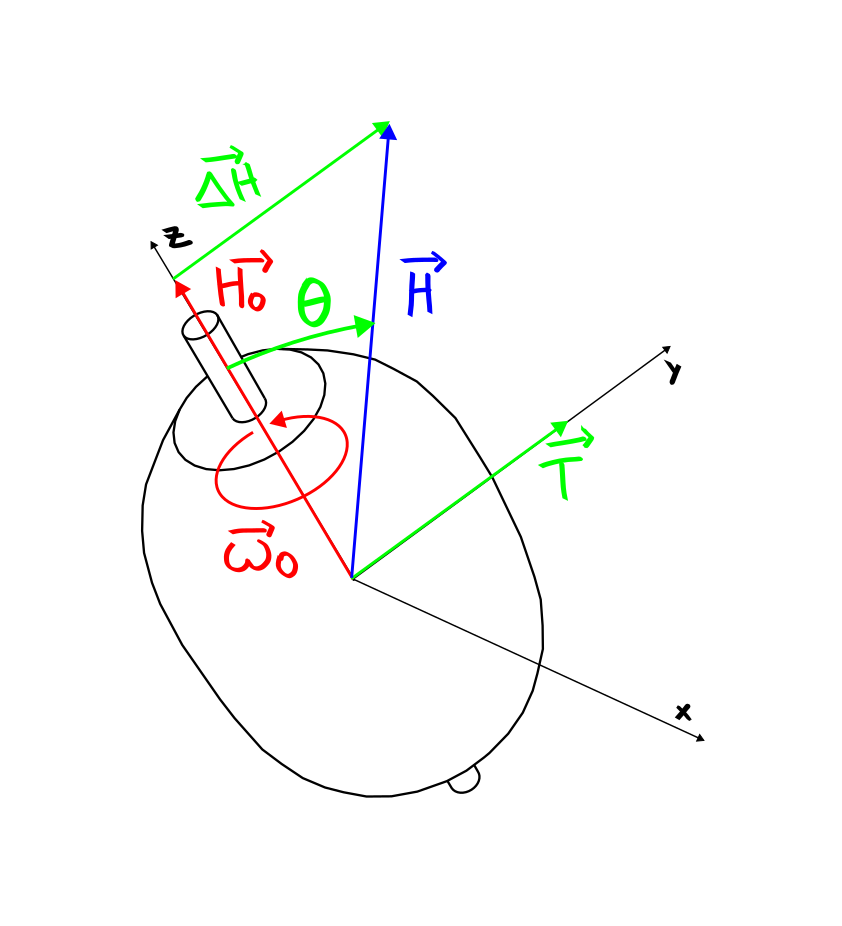

In [93]:
Image('giro2.png',width=400)

O vídeo a seguir mostra um giroscópio formado por um disco uniforme montado em um arranjo chamado *suspensão cardânica*, composta por armaduras externas de massas desprezíveis. 

In [95]:
from IPython.display import Video
Video('giro.mp4', width = 720)

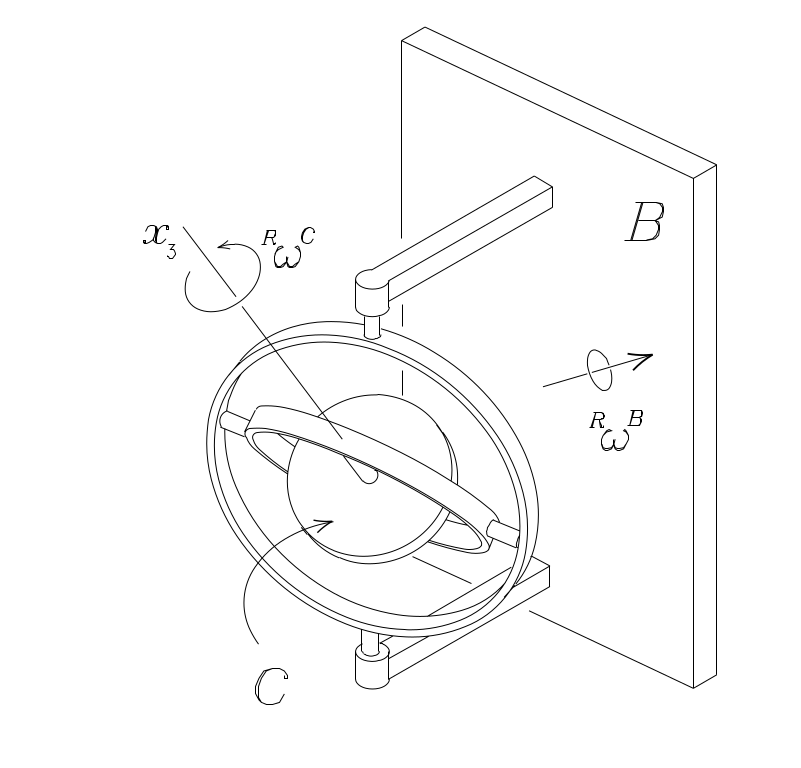

In [96]:
Image('giro-tenenbaum-a.png',width=400)

De acordo com a figura a seguir, o giro de do anel $B$ em relação ao anel $A$ ($\dot{\theta}$) é chamado de nutação e o giro de $A$ em relação a $N$ ($\dot{\phi}$) é chamado de precessão. Observa-se que $\psi$, $\theta$ e $\phi$ são os ângulos de Euler do disco.

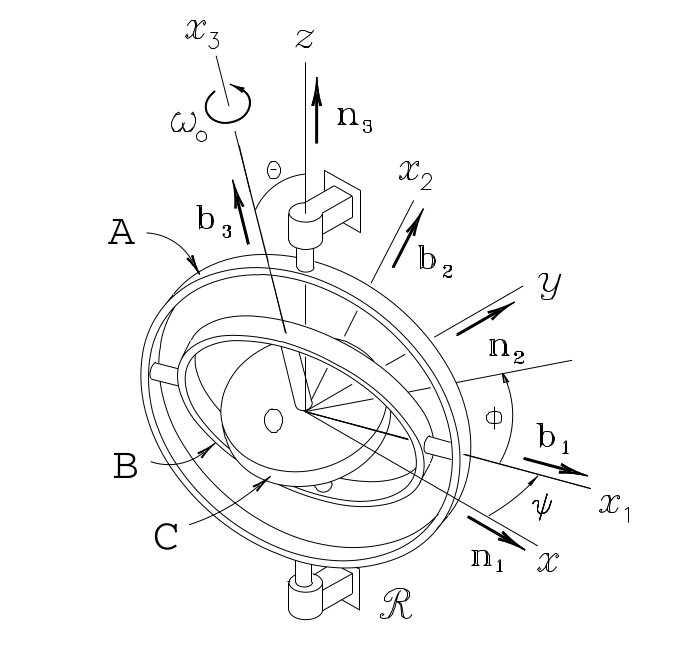

In [98]:
Image('giro-tenenbaum-b.png',width=400)

## 7.3 Forças Distribuídas

Alguns sistemas mecânicos podem possuir forças distribuídas. Para se lidar com estes tipos de forças, torna-se necessário integrá-las na região de aplicação. 

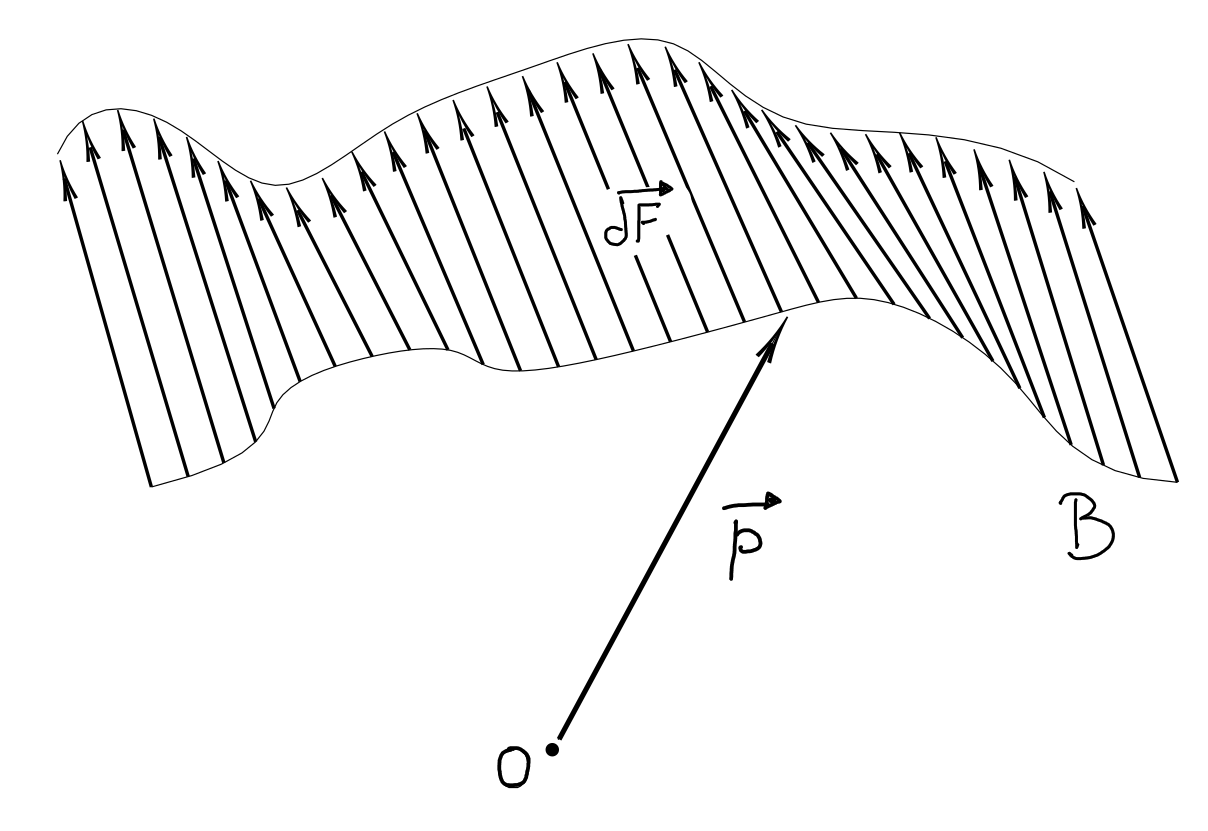

In [101]:
Image('foças-distribuidas.png',width=400)

$$\vec{F} = \int_{B} \vec{dF} $$

$$\vec{M}{}^{F/O} = \int_{B} \vec{p} \times \vec{dF} $$


[Voltar para o capítulo anterior](Din6.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Din8.ipynb)